**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

### **Integrantes:**

> Carolina Chavero  |  Carlos Serra  |  Candela Spitale  |  Franco Aranda
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine, text

sns.set_context('talk')

In [2]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  




#### 1.1 Crear una base de datos en SQLite utilizando la libreria SQLalchemy. https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite


In [3]:
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)

#### 1.2 Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.


In [4]:
# Ingestamos los datos de melb en una tabla de nombre MELB
melb_df.to_sql('melb', con=engine, if_exists="replace")

2022-06-05 21:04:25,041 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")
2022-06-05 21:04:25,044 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 21:04:25,051 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")
2022-06-05 21:04:25,053 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 21:04:25,059 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-05 21:04:25,061 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 21:04:25,064 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")
2022-06-05 21:04:25,066 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 21:04:25,077 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-05 21:04:25,080 INFO sqlalchemy.engine.Engine [raw sql] ('melb',)
2022-06-05 21:04:25,083 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("melb")
2022-06-05 21:

In [5]:
# cargamos dataframe airbnb_df desde archivo generado en clase
URL = 'https://drive.google.com/file/d/1JWswC2X6_ZLE0X5CkJKgZOTdjTukq0bF/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
airbnb_price_by_zipcode_df = pd.read_csv(path)

In [6]:
airbnb_price_by_zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   zipcode                    247 non-null    float64
 1   airbnb_price_mean          247 non-null    float64
 2   airbnb_record_count        247 non-null    int64  
 3   airbnb_weekly_price_mean   184 non-null    float64
 4   airbnb_monthly_price_mean  168 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 9.8 KB


In [7]:
# Ingestamos el dataframe en una nueva tabla de nombre AIRBNB_Z
airbnb_price_by_zipcode_df.to_sql('airbnb_z', con=engine, if_exists="replace")

2022-06-05 21:04:26,913 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_z")
2022-06-05 21:04:26,926 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 21:04:26,930 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb_z")
2022-06-05 21:04:26,933 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 21:04:26,940 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-06-05 21:04:26,951 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb_z (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_monthly_price_mean FLOAT
)


2022-06-05 21:04:26,953 INFO sqlalchemy.engine.Engine [no key 0.00215s] ()
2022-06-05 21:04:26,971 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_z_index ON airbnb_z ("index")
2022-06-05 21:04:26,979 INFO sqlalchemy.engine.Engine [no key 0.00717s] ()
2022-06-05 21:04:26,999 INFO sqlalchemy.engine.Engine COMMIT
2022-06-05 21:04:27,008 INFO sqlalchemy.engine.Engine BEG

#### 1.3 Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.


In [8]:
#PARA EL DATAFRAME Melb
##Cantidad de registros totales por ciudad
query1="SELECT CouncilArea ,COUNT(1) FROM melb GROUP BY CouncilArea ORDER BY CouncilArea ASC" 
##Cantidad de registros totales por barrio y ciudad.
query2="SELECT  Suburb, COUNT(1), CouncilArea FROM melb GROUP BY CouncilArea, Suburb ORDER BY  Suburb ASC"

In [9]:
queries = [query1,query2]

In [10]:
with engine.connect() as con:
    for query in queries:
      rs = con.execute(query)
      print('\n',query,'\n')
      for row in rs:
          print(row)

      print('\n\n')

2022-06-05 21:04:27,115 INFO sqlalchemy.engine.Engine SELECT CouncilArea ,COUNT(1) FROM melb GROUP BY CouncilArea ORDER BY CouncilArea ASC
2022-06-05 21:04:27,120 INFO sqlalchemy.engine.Engine [raw sql] ()

 SELECT CouncilArea ,COUNT(1) FROM melb GROUP BY CouncilArea ORDER BY CouncilArea ASC 

(None, 1369)
('Banyule', 594)
('Bayside', 489)
('Boroondara', 1160)
('Brimbank', 424)
('Cardinia', 8)
('Casey', 38)
('Darebin', 934)
('Frankston', 53)
('Glen Eira', 848)
('Greater Dandenong', 52)
('Hobsons Bay', 434)
('Hume', 164)
('Kingston', 207)
('Knox', 80)
('Macedon Ranges', 7)
('Manningham', 311)
('Maribyrnong', 692)
('Maroondah', 80)
('Melbourne', 470)
('Melton', 66)
('Monash', 333)
('Moonee Valley', 997)
('Moorabool', 1)
('Moreland', 1163)
('Nillumbik', 36)
('Port Phillip', 628)
('Stonnington', 719)
('Unavailable', 1)
('Whitehorse', 304)
('Whittlesea', 167)
('Wyndham', 86)
('Yarra', 647)
('Yarra Ranges', 18)



2022-06-05 21:04:27,180 INFO sqlalchemy.engine.Engine SELECT  Suburb, COUNT(1)

Para exploración adicional también analizamos las consultas anteriores en el dataset de AirBnB original:  

In [11]:
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')
pd.set_option('display.max_columns', None)
airbnb_df[:3]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighborhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighborhood,city,suburb,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,https://a0.muscache.com/im/pictures/44620/5a58...,33057,https://www.airbnb.com/users/show/33057,Manju,8/21/2009,AU,About us: We are an East Indian couple in our ...,a few days or more,0%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,"['email', 'phone', 'reviews']",f,f,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,"Bulleen, Australia",AU,Australia,-37.772684,145.092133,f,House,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",60,NaN,NaN,NaN,NaN,1,22,1,365,17 months ago,t,30,60,90,365,12/7/2018,4,5/24/2011,9/12/2015,90.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,https://a0.muscache.com/im/pictures/31323790/9...,38901,https://www.airbnb.com/users/show/38901,Lindsay,9/16/2009,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,NaN,NaN,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,"Brunswick East, Australia",AU,Australia,-37.766505,144.980736,t,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",35,200.0,803.0,0.0,9.0,1,15,3,45,6 weeks ago,t,4,9,33,213,12/7/2018,108,1/12/2013,11/26/2018,87.0,9.0,8.0,9.0,9.0,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,2.018120e+13,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is

In [12]:
# Ingestamos los datos de AirBnB en una tabla de nombre 'airbnb'
airbnb_df.to_sql('airbnb', con=engine, if_exists="replace")

2022-06-05 21:04:37,211 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-06-05 21:04:37,215 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 21:04:37,220 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb")
2022-06-05 21:04:37,223 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 21:04:37,288 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-06-05 21:04:37,296 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb (
	"index" BIGINT, 
	id BIGINT, 
	listing_url TEXT, 
	scrape_id FLOAT, 
	last_scraped TEXT, 
	name TEXT, 
	summary TEXT, 
	space TEXT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	notes TEXT, 
	transit TEXT, 
	access TEXT, 
	interaction TEXT, 
	house_rules TEXT, 
	picture_url TEXT, 
	host_id BIGINT, 
	host_url TEXT, 
	host_name TEXT, 
	host_since TEXT, 
	host_location TEXT, 
	host_about TEXT, 
	host_response_time TEXT, 
	host_response_rate TEXT, 
	host_is_superhost TEXT, 
	host_thumbnail_url TEXT, 
	host_picture_url TEXT, 
	host_neig

In [13]:
# Para el dataframe AirBnB
##cantidad de registros totales por ciudad
query3="SELECT city, COUNT(1) FROM airbnb GROUP BY city ORDER BY city ASC"
##cantidad de registros totales por barrio y ciudad.
query4="SELECT city, suburb, COUNT(2) FROM airbnb GROUP BY city, suburb  ORDER BY city ASC, suburb ASC "

#### 1.4 Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase. 


In [14]:
query_join="SELECT melb.*,airbnb_z.* FROM  melb LEFT JOIN  airbnb_z ON airbnb_z.zipcode=melb.Postcode ORDER BY airbnb_z.zipcode ASC "

In [15]:
with engine.connect() as con:
      rs = con.execute(query_join).fetchall()
      print('\n',query_join,'\n')
      for row in rs:
          print(row)

Streaming output truncated to the last 5000 lines.
(1894, 'Clifton Hill', '4/56 John St', 1, 'u', 325000.0, 'VB', 'Collins', '13/08/2016', 3.4, 3068.0, 1.0, 1.0, 1.0, 0.0, None, None, 'Yarra', -37.7873, 144.9958, 'Northern Metropolitan', 2954.0, 58, 3068.0, 126.012987012987, 308, 801.3157894736842, 2801.842105263158)
(1895, 'Clifton Hill', '11 Page St', 3, 'h', 1370000.0, 'S', 'Collins', '13/08/2016', 3.4, 3068.0, 3.0, 2.0, 1.0, 176.0, 135.0, 1890.0, 'Yarra', -37.7921, 144.9898, 'Northern Metropolitan', 2954.0, 58, 3068.0, 126.012987012987, 308, 801.3157894736842, 2801.842105263158)
(1896, 'Clifton Hill', '36 Ogrady St', 2, 'h', 1620000.0, 'S', 'Nelson', '15/10/2016', 3.4, 3068.0, 2.0, 1.0, 2.0, 251.0, None, None, 'Yarra', -37.787, 144.9988, 'Northern Metropolitan', 2954.0, 58, 3068.0, 126.012987012987, 308, 801.3157894736842, 2801.842105263158)
(1897, 'Clifton Hill', '69 Field St', 3, 'h', 1180000.0, 'SP', 'Harrington', '16/07/2016', 3.4, 3068.0, 3.0, 3.0, 1.0, 142.0, None, 1995.0, 'Y

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
# creamos un dataframe de la consulta join
melb_data_extended = pd.read_sql(query_join, con=engine)

2022-06-05 21:04:48,925 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT melb.*,airbnb_z.* FROM  melb LEFT JOIN  airbnb_z ON airbnb_z.zipcode=melb.Postcode ORDER BY airbnb_z.zipcode ASC ")
2022-06-05 21:04:48,933 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 21:04:48,936 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT melb.*,airbnb_z.* FROM  melb LEFT JOIN  airbnb_z ON airbnb_z.zipcode=melb.Postcode ORDER BY airbnb_z.zipcode ASC ")
2022-06-05 21:04:48,938 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 21:04:48,941 INFO sqlalchemy.engine.Engine SELECT melb.*,airbnb_z.* FROM  melb LEFT JOIN  airbnb_z ON airbnb_z.zipcode=melb.Postcode ORDER BY airbnb_z.zipcode ASC 
2022-06-05 21:04:48,944 INFO sqlalchemy.engine.Engine [raw sql] ()


In [17]:
melb_data_extended

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,index,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,6817,Campbellfield,11 Bailey Ct,3,h,368000.0,SP,Iconek,3/12/2016,14.5,3061.0,3.0,1.0,2.0,600.0,NaN,NaN,Hume,-37.67830,144.96720,Northern Metropolitan,1889.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6818,Campbellfield,7 Keown Ct,3,h,455000.0,S,YPA,3/12/2016,14.5,3061.0,3.0,1.0,1.0,766.0,NaN,NaN,Hume,-37.68040,144.96640,Northern Metropolitan,1889.0,NaN,NaN,NaN,NaN,NaN,NaN
2,8717,Campbellfield,33 Rainsford Tce,3,h,445000.0,S,Harcourts,20/05/2017,14.5,3061.0,3.0,1.0,2.0,534.0,NaN,NaN,Hume,-37.67410,144.96980,Northern Metropolitan,1889.0,NaN,NaN,NaN,NaN,NaN,NaN
3,8817,Gisborne,3 Sansom St,4,h,521000.0,SP,Raine,1/07/2017,45.9,3437.0,4.0,2.0,2.0,978.0,144.0,1980.0,Macedon Ranges,-37.49642,144.60119,Northern Victoria,3376.0,NaN,NaN,NaN,NaN,NaN,NaN
4,9549,Gisborne,60 Hamilton St,3,h,540000.0,SA,McDonald,17/06/2017,45.9,3437.0,3.0,1.0,2.0,665.0,110.0,1930.0,Macedon Ranges,-37.48701,144.58567,Northern Victoria,3376.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,10039,Sandhurst,4 Galilee Dr,4,h,645000.0,SP,Harcourts,24/06/2017,34.7,3977.0,4.0,2.0,2.0,448.0,187.0,2010.0,Frankston,-38.08170,145.19654,South-Eastern Metropolitan,1721.0,233.0,3977.0,92.955556,45.0,422.0,1025.0
13576,10630,Cranbourne North,5 Aspera Pl,4,h,670000.0,S,Eview,8/07/2017,34.7,3977.0,4.0,2.0,2.0,612.0,NaN,NaN,Casey,-38.07898,145.31650,South-Eastern Metropolitan,6464.0,233.0,3977.0,92.955556,45.0,422.0,1025.0
13577,10978,Cranbourne,25 Springhill Dr,3,h,555000.0,S,Ray,12/08/2017,34.7,3977.0,3.0,2.0,2.0,581.0,NaN,NaN,Casey,-38.08632,145.28343,South-Eastern Metropolitan,7680.0,233.0,3977.0,92.955556,45.0,422.0,1025.0
13578,11960,Cranbourne North,13 Cumquat Ct,4,h,500000.0,S,Ray,29/07/2017,34.7,3977.0,4.0,2.0,0.0,579.0,149.0,1990.0,Casey,-38.07202,145.27369,South-Eastern Metropolitan,6464.0,233.0,3977.0,92.955556,45.0,422.0,1025.0


In [18]:
melb_data_extended.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      13580 non-null  int64  
 1   Suburb                     13580 non-null  object 
 2   Address                    13580 non-null  object 
 3   Rooms                      13580 non-null  int64  
 4   Type                       13580 non-null  object 
 5   Price                      13580 non-null  float64
 6   Method                     13580 non-null  object 
 7   SellerG                    13580 non-null  object 
 8   Date                       13580 non-null  object 
 9   Distance                   13580 non-null  float64
 10  Postcode                   13580 non-null  float64
 11  Bedroom2                   13580 non-null  float64
 12  Bathroom                   13580 non-null  float64
 13  Car                        13518 non-null  flo

## Ejercicio 2:

##2.1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.


**Variables categóricas**: no se pueden medir numéricamente (por ejemplo: nacionalidad, color de la piel, sexo).
1.   *Ordinales*: Aquellas que sugieren una ordenación. Por ejemplo: nivel de estudio, posición de los ganadores de un concurso.
2.   *Nominales*: Aquellas que sólo admiten una mera ordenación alfabética, pero no establecen orden por su contenido. Por ejemplo: género, estado civil, color de cabello.


**Variables cuantitativas**: tienen valor numérico (edad, precio de un producto, ingresos anuales). Por su parte, las variables cuantitativas se pueden clasificar en:
1.   *Discretas*: sólo pueden tomar valores enteros (1, 2, 8, -4, etc.). Por ejemplo: número de hermanos (puede ser 1, 2, 3...., etc., pero, por ejemplo, nunca podrá ser 3.45).
2.   *Continuas*: pueden tomar cualquier valor real dentro de un intervalo. Por ejemplo, la velocidad de un vehículo puede ser 90.4 km/h, 94.57 km/h...etc

In [19]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

 Viendo la descripción de las variables del dataset puesta en [su fuente](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market) y el tipo de cada variables, distinguimos:
  
   **Categóricas Nominales**: 'Type', 'Suburb', 'CouncilArea', 'Address', 'Method', 'SellerG', 'Regionname'

   **Categóricas Ordinales**: 'YearBuilt', 'Date'

   **Numéricas Continuas**: 'Landsize', 'BuildingArea', 'Lattitude',
       'Longtitude', 'Distance', 'Price'
  
   **Numéricas Discretas**: 'Rooms', 'Bathroom', 'Bedroom2', 'Car', 'Postcode', 'Propertycount'
  
Para tasar una propiedad, es decir, estimar su valor de venta, se deben tener en cuenta sus características básicas como tipo de propiedad, cantidad de ambientes y ubicación. También se deben buscar propiedades de características similares a la propiedad que se está tasando, dicha comparación permitirá establecer un precio competitivo del inmueble en el mercado. Una vez hecha esta investigación, se deberá tener en cuenta el valor del metro cuadrado de propiedades similares a la que se quiere valuar, dividiendo el valor de cada una de ellas por su respectiva superficie expresada en metros cuadrados. 

Teniendo en cuenta este procedimiento de valuación de vivienda, seleccionamos las siguientes variables que den cuenta de características de:

- la propiedad: 
    
  * tipo (`Type`)
  * número de habitaciones (`Rooms`)
  * baño (`Bathroom`)
  * garage (`Car`)
  * tamaño del terreno (`Landsize`)
  * metros cuadrados construidos (`BuildingArea`)
  * año de construcción (`YearBuilt`)
        
- la ubicación: 
    * coordendas (`Lattitude` y `Longtitude`)
    * municipio (`CouncilArea`)
    * barrio (`Suburb`)
    * código postal (Postcode)
    * distancia al centro geográfico (`Distance`)
        
- la venta: 
    * precio de venta diario en dólares australianos (`Price`)

Por otro lado, no tomamos en cuenta las siguientes variables:

  * Dirección (`Address`): se vuelve redundante para obtener la ubicación de una propiedad teniendo ya las coordenadas, que son más fáciles de identificar geográficamente. 
  * Vendedor (`SellerG`): el vendedor de la propiedad podría tener relación con el precio pero, suponemos que este tomó en cuenta la zona y características la propiedad para determinar el precio inicial, y además tomaremos métricas como el promedio para comparar los precios de cada vecindario, lo cuál abarcará en principio a cada vendededor.
  * Método de venta (`Method`): por sus posibles valores, entendemos que el método de venta no parece agregar información relevante sobre el precio de una propiedad.
  * Fecha de publicación (`Date`): en la fecha del venta, se podría considerar  el mes y año para ver la variación en porcentaje de precio en estas temporalidades, pero la descartamos para no aumentar tanta cantidad de columnas en la parte 2, sabiendo que trabajamos con años consecutivos.
  * Cantidad de dormitorios (`Bedroom2`): esta columna se eliminó puesto que es un dato obtenido mediante la union con otra database. La reemplazamos por `Rooms` puesto que, sabiendo que están correlacionadas por lo visto en clase, esta variable es mucho mas informativa que `Bedroom2` por lo cual podemos descartar la primera.
  * Region (`Regionname`): esta variable se eliminó porque tenemos otras columnas mas específicas sobre ubicación.
  * Cantidad de propiedades en el barrio (`Propertycount`): no deberia influir sobre el precio de venta.

In [20]:
df_melb_curado = melb_df.copy()
# Eliminamos las columnas Bedroom2, 'Address', 'SellerG', 'Method', 'Date', 'Regionname', 'Propertycount'
df_melb_curado.drop('Bedroom2', inplace=True, axis=1)
df_melb_curado.drop('Address', inplace=True, axis=1)
df_melb_curado.drop('SellerG', inplace=True, axis=1)
df_melb_curado.drop('Method', inplace=True, axis=1)
df_melb_curado.drop('Date', inplace=True, axis=1)
df_melb_curado.drop('Regionname', inplace=True, axis=1)
df_melb_curado.drop('Propertycount', inplace=True, axis=1)

**Identificación y eliminación de valores extremos (outliers)**


Analizamos posibles outliers

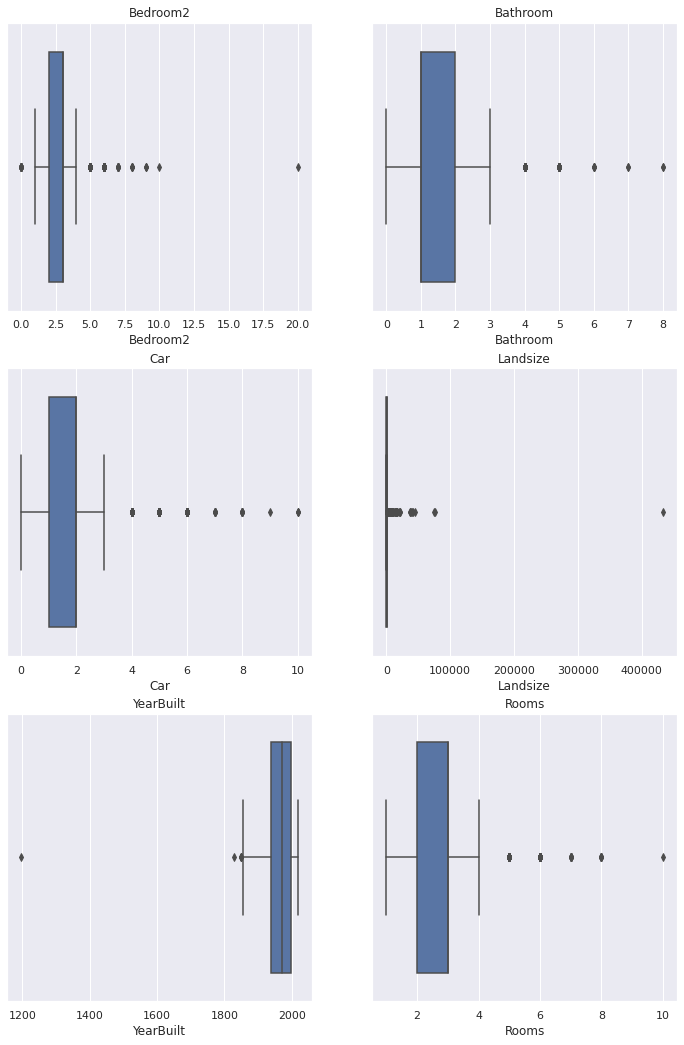

In [21]:
# Definimos area de 4 subplots (3 x 2)
sns.set()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,18))

# Creamos 1 boxplot en cada subplot
axes[0,0].set_title('Bedroom2')
sns.boxplot(data=melb_df, x='Bedroom2', ax=axes[0,0])

axes[0,1].set_title('Bathroom')
sns.boxplot(data=melb_df, x='Bathroom', ax=axes[0,1])

axes[1,0].set_title('Car')
sns.boxplot(data=melb_df, x='Car', ax=axes[1,0])

axes[1,1].set_title('Landsize')
sns.boxplot(data=melb_df, x='Landsize', ax=axes[1,1])

axes[2,0].set_title('YearBuilt')
sns.boxplot(data=melb_df, x='YearBuilt', ax=axes[2,0])

axes[2,1].set_title('Rooms')
sns.boxplot(data=melb_df, x='Rooms', ax=axes[2,1])


Eliminamos propiedades que tengan un elevado numero de garage y tamaño de terreno, que quizá correspondan a complejos u hoteles muy grandes que no son reprentativos como puede verse en la próxima celda.


In [22]:
df_melb_curado = df_melb_curado[df_melb_curado['Car'] <= 4]
df_melb_curado = df_melb_curado[df_melb_curado['Landsize'] > 0] #descarta casi 2000
df_melb_curado = df_melb_curado[df_melb_curado['Landsize'] <= 10000]

df_melb_curado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11418 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        11418 non-null  object 
 1   Rooms         11418 non-null  int64  
 2   Type          11418 non-null  object 
 3   Price         11418 non-null  float64
 4   Distance      11418 non-null  float64
 5   Postcode      11418 non-null  float64
 6   Bathroom      11418 non-null  float64
 7   Car           11418 non-null  float64
 8   Landsize      11418 non-null  float64
 9   BuildingArea  5958 non-null   float64
 10  YearBuilt     6792 non-null   float64
 11  CouncilArea   10143 non-null  object 
 12  Lattitude     11418 non-null  float64
 13  Longtitude    11418 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.3+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


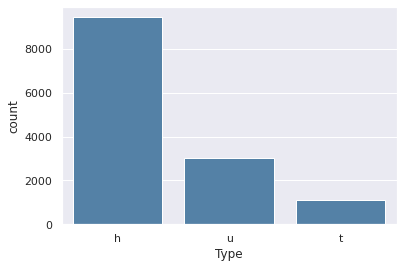

In [23]:
# Vemos la frecuencia de tipos de propiedades resultantes
fig = plt.figure(figsize=(6,4))
sns.countplot(melb_df['Type'], color='steelblue')

plt.show()

In [24]:
melb_df.shape

(13580, 21)

In [25]:
df_melb_curado.shape

(11418, 14)

2.2 Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.

2.2.1   Seleccionar qué variables agregar y qué combinaciones aplicar a cada una.
Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.



In [26]:
melb_df['date'] = pd.to_datetime(melb_df.Date)

In [27]:
melb_df['date_year'] = pd.DatetimeIndex(melb_df['date']).year
melb_df['date_year'].unique()

array([2016, 2017])

In [28]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22895 non-null  int64  
 1   listing_url                       22895 non-null  object 
 2   scrape_id                         22895 non-null  float64
 3   last_scraped                      22895 non-null  object 
 4   name                              22892 non-null  object 
 5   summary                           22199 non-null  object 
 6   space                             16844 non-null  object 
 7   description                       22563 non-null  object 
 8   neighborhood_overview             14424 non-null  object 
 9   notes                             11546 non-null  object 
 10  transit                           14943 non-null  object 
 11  access                            15168 non-null  object 
 12  inte

In [29]:
melb_df.shape

(13580, 23)

In [30]:
airbnb_df.shape

(22895, 84)

Por lo visto, sabemos que las publicaciones de ventas de propiedades en Melbourne, Australia, del dataset en este caso de DanB (`melb_df`) son de los años 2016 y 2017. Mientras que, el dataset de AirBnB (`airbnb_df`) de alquileres en Melbourne es de publicaciones en el año 2018, según lo visto en el práctico. 

Recordemos que el **objetivo** es estimar con mayor presición el valor del vecindario de cada propiedad, por lo que, a priori, se puede cruzar el precio de alquiler en un vecindario con el precio de venta de ese mismo vecindario, para ver qué tan caro es alquilar ahí, aparte de comprar, y ver correlaciones.

Cabe aclarar también, que los precios en ambos datasets, están medidos en dólar australiano (AUD) -Verificado en [data dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing) de la página fuente http://insideairbnb.com/ para obtener descripción sobre las columnas a escoger de este dataset (`airbnb_df`), y en [melbourne-housing-market](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market) con la descripción de las columnas originales sobre el dataset de ventas (`melb_df`)-

Investigando sobre Melbourne para entrar en contexto del dominio, encontramos en distintas fuentes ([fuente 1](https://hmong.es/wiki/List_of_Melbourne_suburbs) y [fuente 2](https://es.db-city.com/Australia--Victoria)) que es una de las ciudades, de hecho la capital, dentro de Victoria, uno de los estados de Australia. 

Otro detalle importante es que cada suburbio tiene su **código postal**. Algunos suburbios comparten el mismo código postal (por estos motivos consideramos el `zipcode` como parámetro para acceder al precio de cada vencindario/grupo de vecindarios). En el dataset resultante de clase a partir de los datos de AirBnB, se agrupó por zipcode, y al haber encontrado la información recién mencionada, nos parece conveniente utilizar esta columna como asociación entre los dos dataframes. 

Columnas de intersés a analizar: 

* 'neighborhood', 
* 'city', 
* 'suburb', 
* 'state', 
* 'zipcode',
* 'price', 
* 'weekly_price', 
* 'monthly_price',
* 'latitude', 
* 'longitude', 
* 'bedrooms', 
* 'badrooms', 
* 'property_type', 
* 'lattitude', 
* 'longtitude'

In [31]:
airbnb_df.zipcode.value_counts().head(5)

3000.0    2491
3000       876
3006.0     860
3182.0     579
3182       556
Name: zipcode, dtype: int64

> => Escogemos `zipcode`

**Variables que corresponden al valor de precio de alquiler de la propiedad**

In [32]:
print(airbnb_df.monthly_price.isnull().sum())
print(airbnb_df.weekly_price.isnull().sum())
print(airbnb_df.price.isnull().sum())

21004
20371
0


(0.0, 20500.0)

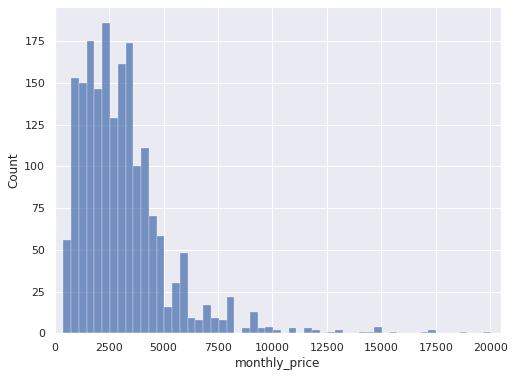

In [33]:
fig = plt.figure(figsize=(8,6))
sns.histplot(airbnb_df.monthly_price.dropna())
plt.xlim(0, 20500)

(0.0, 6000.0)

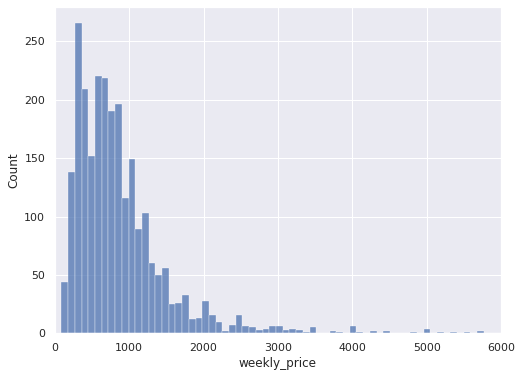

In [34]:
fig = plt.figure(figsize=(8,6))
sns.histplot(airbnb_df.weekly_price.dropna())
plt.xlim(0, 6000)

(0.0, 1200.0)

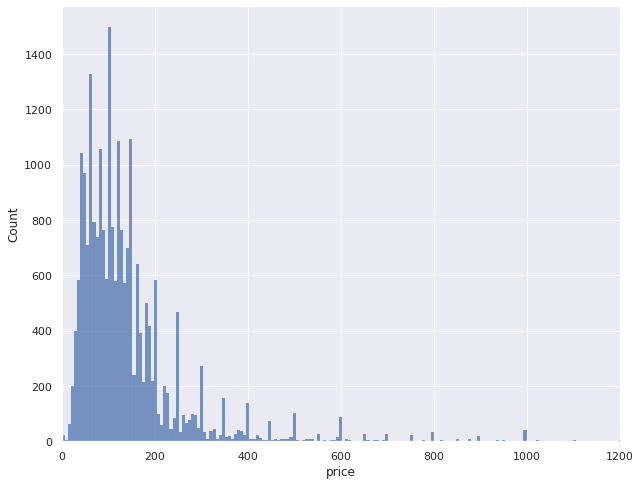

In [35]:
fig = plt.figure(figsize=(10,8))
sns.histplot(airbnb_df.price.dropna())
plt.xlim(0, 1200)

Después de ver estas distribuciones y la cantidad de registros no nulos para cada columna, para agregar información del precio, notamos que la columna `price`, si bien el día suele ser algo más caro en proporción a semana o mes, no tiene ningún valor nulo, mientras que las otras tienen muchos. Por otro lado,la frecuencia máxima de `weekly_price` y `monthly_price` es menos de 1/4 de la frecuencia de la columna `price`. Esta última columna nos permitirá saber con más aproximación, qué tan caro es vivir dentro de cierto vecindario.

=> Elegimos `price`. 

**Comparación de columnas asociadas a municipios en ambos datasets**

Comparando los datos de las fuentes mencionadas anteriormente, encontramos que tanto la columna `city` del dataset de AirBbB como `CouncilArea` del dataset de ventas, se refieren a **municipios** de Melbourne, y cada uno tiene sus **suburbios** (**vecindarios**). 

In [36]:
cities_melb_list = melb_df.CouncilArea.dropna().unique().tolist()
cities_airbnb_list = airbnb_df.city.dropna().unique().tolist()
intersec_airbnb_cities_with_melb_cities = list(set(cities_melb_list).intersection(cities_airbnb_list))

In [37]:
# not intersec
not_intersec_airbnb_cities_with_melb_cities = list(set(cities_melb_list) - set(intersec_airbnb_cities_with_melb_cities))
print(len(not_intersec_airbnb_cities_with_melb_cities))
not_intersec_airbnb_cities_with_melb_cities

3


['Unavailable', 'Moorabool', 'Macedon Ranges']

In [38]:
print("Cantidad de registros no nulos en cities_airbnb_list = {}".format(len(cities_airbnb_list)))
print("Cantidad de registros no nulos en cities_melb_list = {}".format(len(cities_melb_list)))
print("Cantidad de registros no nulos en intersec_airbnb_cities_with_melb_cities = {}".format(len(intersec_airbnb_cities_with_melb_cities)))
print("Cantidad de registros no nulos en not_intersec_airbnb_cities_with_melb_cities = {}".format(len(not_intersec_airbnb_cities_with_melb_cities)))

Cantidad de registros no nulos en cities_airbnb_list = 30
Cantidad de registros no nulos en cities_melb_list = 33
Cantidad de registros no nulos en intersec_airbnb_cities_with_melb_cities = 30
Cantidad de registros no nulos en not_intersec_airbnb_cities_with_melb_cities = 3


In [39]:
print("Cantidad de registros nulos en cities (CouncilArea) de melb_df = {}".format(melb_df.CouncilArea.isnull().sum()))
print("Cantidad de registros nulos en cities de df_airbnb = {}".format(airbnb_df.city.isnull().sum()))

Cantidad de registros nulos en cities (CouncilArea) de melb_df = 1369
Cantidad de registros nulos en cities de df_airbnb = 0


Ya que ambas columnas presentan casi la totalidad de valores distintos en común y, si bien `CouncilArea` posee varios valores nulos y `city` no, la columna `CouncilArea` se podría imputar considerando el `Suburb` y `Postcode`, por lo que podemos obviar la columna `city` ya que estará representada por `CouncilArea`.

**Columnas asociadas a vecindarios**

Según el contexto estudiado, las columnas relacionadas a vecindarios en este dataset son `neighborhood` y `suburb`. Veamos cómo son los datos de estas columnas, y los datos de la columna `Suburb` del dataset de ventas para poder compararlos y decidir cuáles columnas del dataset de alquileres incorporar.

In [40]:
airbnb_neighborhoods = airbnb_df.neighborhood.dropna().unique().tolist()
melb_suburbs = melb_df.Suburb.dropna().unique().tolist()
airbnb_suburbs = airbnb_df.suburb.dropna().unique().tolist()
intersec_airbnb_suburbs_with_airbnb_neighborhoods = list(set(airbnb_neighborhoods).intersection(airbnb_suburbs))
# not intersec
not_intersec_airbnb_suburbs_with_airbnb_neighborhoods = list(set(airbnb_suburbs) - set(intersec_airbnb_suburbs_with_airbnb_neighborhoods))
intersec_melb_suburbs_with_airbnb_neighborhoods = list(set(airbnb_neighborhoods).intersection(melb_suburbs))
# not intersec
not_intersec_melb_suburbs_with_airbnb_neighborhoods = list(set(melb_suburbs) - set(intersec_melb_suburbs_with_airbnb_neighborhoods))
intersec_melb_suburbs_with_airbnb_suburbs = list(set(airbnb_suburbs).intersection(melb_suburbs))
# not intersec
not_intersec_melb_suburbs_with_airbnb_suburbs = list(set(airbnb_suburbs) - set(intersec_melb_suburbs_with_airbnb_suburbs))

In [41]:
print("Cantidad de valores distintos no nulos en airbnb_neighborhoods = {}".format(len(airbnb_neighborhoods)))
print("Cantidad de valores distintos no nulos en melb_suburbs = {}".format(len(melb_suburbs)))
print("Cantidad de valores distintos no nulos en airbnb_suburbs = {}".format(len(airbnb_suburbs)))
print("Cantidad de valores distintos no nulos en intersec_airbnb_suburbs_with_airbnb_neighborhoods = {}".format(len(intersec_airbnb_suburbs_with_airbnb_neighborhoods)))
print("Cantidad de valores distintos no nulos en not_intersec_airbnb_suburbs_with_airbnb_neighborhoods = {}".format(len(not_intersec_airbnb_suburbs_with_airbnb_neighborhoods)))
print("Cantidad de valores distintos no nulos en intersec_melb_suburbs_with_airbnb_neighborhoods = {}".format(len(intersec_melb_suburbs_with_airbnb_neighborhoods)))
print("Cantidad de valores distintos no nulos en not_intersec_melb_suburbs_with_airbnb_neighborhoods = {}".format(len(not_intersec_melb_suburbs_with_airbnb_neighborhoods)))
print("Cantidad de valores distintos no nulos en intersec_melb_suburbs_with_airbnb_suburbs = {}".format(len(intersec_melb_suburbs_with_airbnb_suburbs)))
print("Cantidad de valores distintos no nulos en not_intersec_melb_suburbs_with_airbnb_suburbs = {}".format(len(not_intersec_melb_suburbs_with_airbnb_suburbs)))

Cantidad de valores distintos no nulos en airbnb_neighborhoods = 59
Cantidad de valores distintos no nulos en melb_suburbs = 314
Cantidad de valores distintos no nulos en airbnb_suburbs = 542
Cantidad de valores distintos no nulos en intersec_airbnb_suburbs_with_airbnb_neighborhoods = 53
Cantidad de valores distintos no nulos en not_intersec_airbnb_suburbs_with_airbnb_neighborhoods = 489
Cantidad de valores distintos no nulos en intersec_melb_suburbs_with_airbnb_neighborhoods = 51
Cantidad de valores distintos no nulos en not_intersec_melb_suburbs_with_airbnb_neighborhoods = 263
Cantidad de valores distintos no nulos en intersec_melb_suburbs_with_airbnb_suburbs = 296
Cantidad de valores distintos no nulos en not_intersec_melb_suburbs_with_airbnb_suburbs = 246


In [42]:
print("Cantidad de registros nulos en Suburb de melb_df = {}/{}".format(melb_df.Suburb.isnull().sum(), len(melb_df.Suburb)))
print("Cantidad de registros nulos en suburb de airbnb_df = {}/{}".format(airbnb_df.suburb.isnull().sum(), len(airbnb_df.suburb)))
print("Cantidad de registros nulos en neighborhood de airbnb_df = {}/{}".format(airbnb_df.neighborhood.isnull().sum(), len(airbnb_df.neighborhood)))

Cantidad de registros nulos en Suburb de melb_df = 0/13580
Cantidad de registros nulos en suburb de airbnb_df = 23/22895
Cantidad de registros nulos en neighborhood de airbnb_df = 5813/22895


La cantidad de datos no nulos para la columna `neighborhood` de AirBnB es 59, y tanto la columna `suburb` de AirBnB como la columna `Suburb` del dataset de ventas, tienen en común la mayoría de los vecindarios con `neighborhood` (53 y 51 respectivamente). Además, podemos observar que la columna `neighborhood` tiene muchísimos datos nulos más que las otras columnas mencionadas, por lo que no sería una buena opción para incorporar. 

Por otro lado, `Suburb` del dataset de ventas no comprende valores nulos y posee más valores únicos que las dos columnas asociadas a vecindarios de AirBnB. Por esto y porque ya tenemos el **código postal** como parámetro de ubicación de vecindarios, se pueden obviar estas dos columnas.

**Columnas asociadas a geolocalización**

Ya que el conjunto de datos de ventas consideramos columnas para poder geolocalizar las propiedades, `Lattitude` y `Longtitude`, también descartamos las columnas de AirBnB `lattitude` y `longtitude` puesto que aportarían información redundante. Por otro lado si pensamos en agrupar por estas columnas, sólo resultarían propiedades con iguales coordenadas de ambos datasets y se descartarían las de ventas que no coincidan. Por esta razón también creemos conveniente agrupar por **código postal** y descartar estas variables.

**Columnas asociadas a tipo de propiedad e interior de la propiedad de ambos datasets**

In [43]:
airbnb_df.property_type.unique()

array(['House', 'Apartment', 'Loft', 'Townhouse', 'Hotel', 'Guesthouse',
       'Guest suite', 'Farm stay', 'Condominium', 'Bed and breakfast',
       'Serviced apartment', 'Cottage', 'Other', 'Boutique hotel',
       'Earth house', 'Bungalow', 'Villa', 'Tiny house', 'Nature lodge',
       'Cabin', 'Hostel', 'Barn', 'Train', 'Boat', 'Camper/RV',
       'Campsite', 'Treehouse', 'Tent', 'Chalet', 'Aparthotel', 'Castle',
       'Resort', 'Hut', 'Minsu (Taiwan)', 'Casa particular (Cuba)'],
      dtype=object)

In [44]:
len(airbnb_df.property_type.unique())

35

Valores posibles de `Type` del dataset de ventas:

* br - bedroom(s);
* h - house,cottage,villa, semi,terrace;
* u - unit, duplex;
* t - townhouse; 

In [45]:
airbnb_df.bathrooms.unique()

array([ 1. ,  1.5,  2.5,  2. ,  nan,  3. ,  6. ,  0.5,  0. ,  5. ,  8. ,
        4. ,  3.5,  4.5,  7. , 14. ,  9. ,  7.5,  5.5,  6.5, 10. ])

In [46]:
airbnb_df.bedrooms.unique()

array([ 1.,  3.,  2.,  4.,  5., 10.,  0.,  6.,  7.,  9., nan, 16.,  8.,
       11.])

* `property_type`, al igual que `Type` del dataset de ventas, refiere al tipo de propiedad, pero ambas tienen opciones de valores muy diferentes, además de que, si se hiciera una correspondencia de sus valores, se seguiría aportando información redundante. 

* Lo mismo ocurre con `bathrooms` y `bedrooms`, además de que ambas necesitan el tratado de valores faltantes.

### En conclusión, incluímos `zipcode` y `price` del dataframe `airbnb_df` para agregar información asociada a vecindarios del dataframe `melb_df`.

2.2.2   Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.


In [47]:
# Convertimos el tipo del zipcode en uno solo, float64
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

In [48]:
intersection = np.intersect1d(
    airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


In [49]:
print('Records in Sales df with corresponding zipcode form Airbnb df',
      melb_df.Postcode.isin(intersection).sum() / len(melb_df))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      airbnb_df.zipcode.isin(intersection).sum() / len(airbnb_df))

Records in Sales df with corresponding zipcode form Airbnb df 0.9985272459499264
Records in Airbnb df with corresponding zipcode form Sales df 0.9302904564315353


In [50]:
# Definimos las columnas que necesitamos de AirBnB para dar más información para estimar precio de popiedades
# relevant_cols = ['zipcode', 'price_avg', 'price_min', 'price_max']

# Creamos una consulta que agrupa registros del conjunto de AirBnB por zipcode y eliminamos los zipcode con menos de 5 registros 
query_airbnb_relevant_cols = "SELECT zipcode, AVG(price) AS price_avg, MIN(price) AS price_min, MAX(price) AS price_max FROM airbnb WHERE zipcode IN (SELECT zipcode FROM airbnb GROUP BY zipcode HAVING COUNT(1) >= 5) GROUP BY zipcode" 

query_airbnb_relevant_cols_df = pd.read_sql(query_airbnb_relevant_cols, con=engine)

query_airbnb_relevant_cols_df.info()

2022-06-05 21:05:07,841 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT zipcode, AVG(price) AS price_avg, MIN(price) AS price_min, MAX(price) AS price_max FROM airbnb WHERE zipcode IN (SELECT zipcode FROM airbnb GROUP BY zipcode HAVING COUNT(1) >= 5) GROUP BY zipcode")
2022-06-05 21:05:07,844 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 21:05:07,849 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT zipcode, AVG(price) AS price_avg, MIN(price) AS price_min, MAX(price) AS price_max FROM airbnb WHERE zipcode IN (SELECT zipcode FROM airbnb GROUP BY zipcode HAVING COUNT(1) >= 5) GROUP BY zipcode")
2022-06-05 21:05:07,852 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 21:05:07,854 INFO sqlalchemy.engine.Engine SELECT zipcode, AVG(price) AS price_avg, MIN(price) AS price_min, MAX(price) AS price_max FROM airbnb WHERE zipcode IN (SELECT zipcode FROM airbnb GROUP BY zipcode HAVING COUNT(1) >= 5) GROUP BY zipcode
2022-06-05 21:05:07,856 INFO sqlalchemy.eng

In [51]:
query_airbnb_relevant_cols_df[:100]

,zipcode,price_avg,price_min,price_max
0,3000,154.110731,14,9000
1,3000.0,149.236050,0,2171
2,3002,200.607477,19,1395
3,3002.0,201.422222,32,1550
4,3003,137.607843,32,400
...,...,...,...,...
95,3068.0,124.006757,30,800
96,3070,102.975000,19,350
97,3070.0,120.823171,28,800
98,3071,146.433333,26,2500


In [54]:
# Convertimos el tipo del zipcode en uno solo, float64
query_airbnb_relevant_cols_df['zipcode'] = pd.to_numeric(
    query_airbnb_relevant_cols_df.zipcode, errors='coerce'
)

In [55]:
# Unimos el dataframe de ventas con el agrupado de AirBnB haciendo un LEFT JOIN
merged_sales_df = df_melb_curado.merge(
    query_airbnb_relevant_cols_df, how='left',
    left_on='Postcode', right_on='zipcode'
)

In [56]:
merged_sales_df.drop(['zipcode'], axis=1, inplace=True)
print(merged_sales_df.columns)

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'price_avg', 'price_min', 'price_max'],
      dtype='object')


In [57]:
merged_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21620 entries, 0 to 21619
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        21620 non-null  object 
 1   Rooms         21620 non-null  int64  
 2   Type          21620 non-null  object 
 3   Price         21620 non-null  float64
 4   Distance      21620 non-null  float64
 5   Postcode      21620 non-null  float64
 6   Bathroom      21620 non-null  float64
 7   Car           21620 non-null  float64
 8   Landsize      21620 non-null  float64
 9   BuildingArea  11284 non-null  float64
 10  YearBuilt     12884 non-null  float64
 11  CouncilArea   19282 non-null  object 
 12  Lattitude     21620 non-null  float64
 13  Longtitude    21620 non-null  float64
 14  price_avg     21374 non-null  float64
 15  price_min     21374 non-null  float64
 16  price_max     21374 non-null  float64
dtypes: float64(13), int64(1), object(3)
memory usage: 3.0+ MB


2.2.3   Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.



```
`# This is formatted as code`
```


*   La columna `CouncilArea` del archivo de alquileres refiere a ciudades -municipios-, por lo que podemos combinar ambos origenes por ciudad (Columna `city` y columna `CouncilArea`), si bien hace falta imputar `CouncilArea` antes de esta acción.

*   Se pueden definir polígonos que representen ZONAS mas acotadas que aquella que determina un **código postal**. Por ejemplo el **código postal** 5009 abarca en ZONA norte varios barrios con características y precios muy diferentes: URCA, CERRO DE LAS ROSAS, ESCOBAR, BAJO PALERMO, etc.
Teniendo latitud y longitud en ambas tablas, es posible asociar cada registro con esas zonas. Luego se pueden unir ambas tablas por ZONA. Por ejemplo definimos areas que son consideradas como muy buscadas (1,2,5) y zonas que no los son tanto (3,4,6)

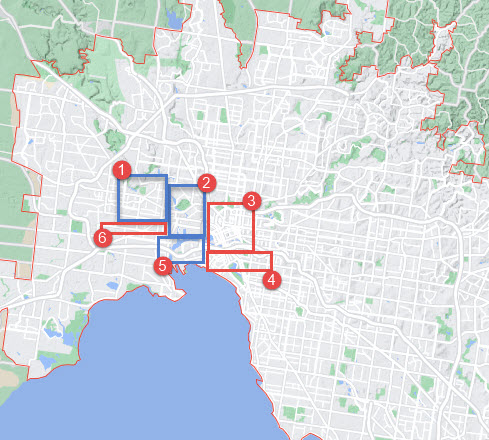







*   Otra opción es relacionar ambas tablas por suburbio (`Suburb` y `suburb`), lo que entendemos como vecindario, ya que presentan bastantes datos en común y se podría imputar `Suburb` del dataset de ventas.

In [58]:
melb_suburbs = melb_df.Suburb.dropna().unique().tolist()
airbnb_suburbs = airbnb_df.suburb.dropna().unique().tolist()
intersection = list(set(melb_suburbs).intersection(airbnb_suburbs))
print("Airbnb unique suburbs", len(airbnb_suburbs))
print("Sales unique suburbs", len(melb_suburbs))
print("Common suburbs", len(intersection))

Airbnb unique suburbs 542
Sales unique suburbs 314
Common suburbs 296


## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [59]:
# Guardamos el dataframe para uso futuro
merged_sales_df.to_csv("merged_sales_df.csv", index=None)
from google.colab import files 
files.download('merged_sales_df.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)